#### EVFE Project on titanic dataset from kaggle.

In [12]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [5]:
titanic <- read.csv("train.csv")
head(titanic)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


### Check data type.
Following the initial pull of the dataset into the notebook then calling head to view the basic table. We want to check data types and begin our exploration and feature engineering process. We do this first by calling the str method (struct) in R to determine the data types of each vector. Carefully looking at each individual one to see if it has any relevance to our hypothesis or business need. Make sure to ask questions like " Does this data type correctly portray the naming and value conventions its trying to exhibit". 

In [6]:
str(titanic)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In the above struct call, the "survived" vector is cast as an int data type with a value of 0 or 1. We want to type cast this as a factor(Object) instead. We to this to create more meaningful categories or labels for our data set.

In [7]:
titanic$Survived <- as.factor(titanic$Survived) # Calling titanic variable, survived category and using as.factor to re-cast it.

In [8]:
# Renaming factor levels.
levels(titanic$Survived) <- c("Dead", "Survived")
levels(titanic$Embarked) <- c("Unknown", "Cherbourg", "Queenstown", "Southampton")

str(titanic[,c("Embarked", "Survived")])

'data.frame':	891 obs. of  2 variables:
 $ Embarked: Factor w/ 4 levels "Unknown","Cherbourg",..: 4 2 4 4 4 3 4 4 4 2 ...
 $ Survived: Factor w/ 2 levels "Dead","Survived": 1 2 2 2 1 1 1 1 2 2 ...


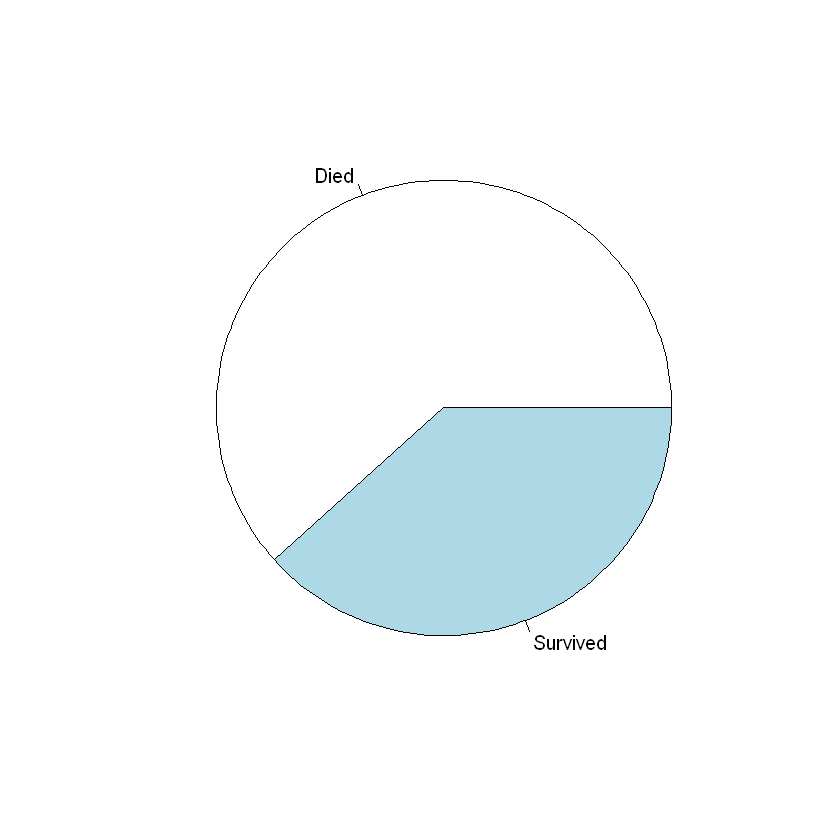

In [9]:
# Checking class distribution using pie chart
survivedTable <- table(titanic$Survived)
pie(survivedTable, labels=c("Died", "Survived"))

Now that we have cleaned up the data set a bit and done some inital exploration and visualization, its time to ask some questions. Is sex a good predictor of surviviability is a good place to start. Were going to use a segmentated bar graph to visualize this. To do this we create a variable called sex.survived.plt we then call ggplot to pull information from the titanic variable which contains our train.csv dataset. we call aesthetic (aes) to plot the "Sex" vector and fill the "survived" value we created previously as a different color.

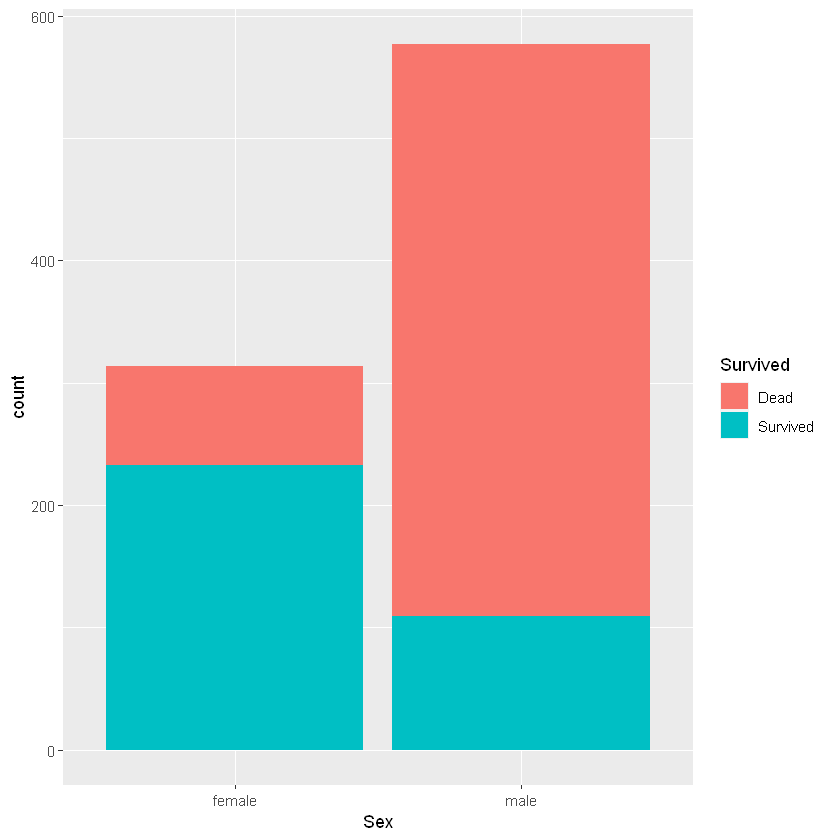

In [17]:
sex.survived.plt <- ggplot(titanic, aes(x=Sex, fill=Survived))
sex.survived.plt + geom_bar()

We can then use facet wrap to stitch two plots together. 

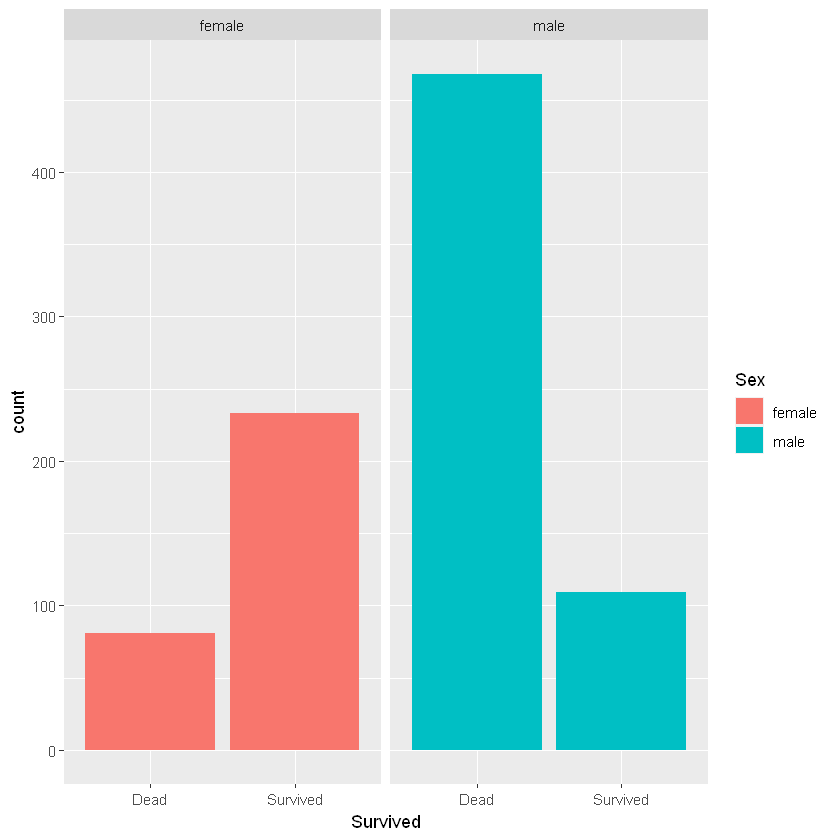

In [18]:
survived.sex.plt <- ggplot(titanic, aes(x=Survived, fill=Sex))
survived.sex.plt + geom_bar() + facet_wrap(~Sex)

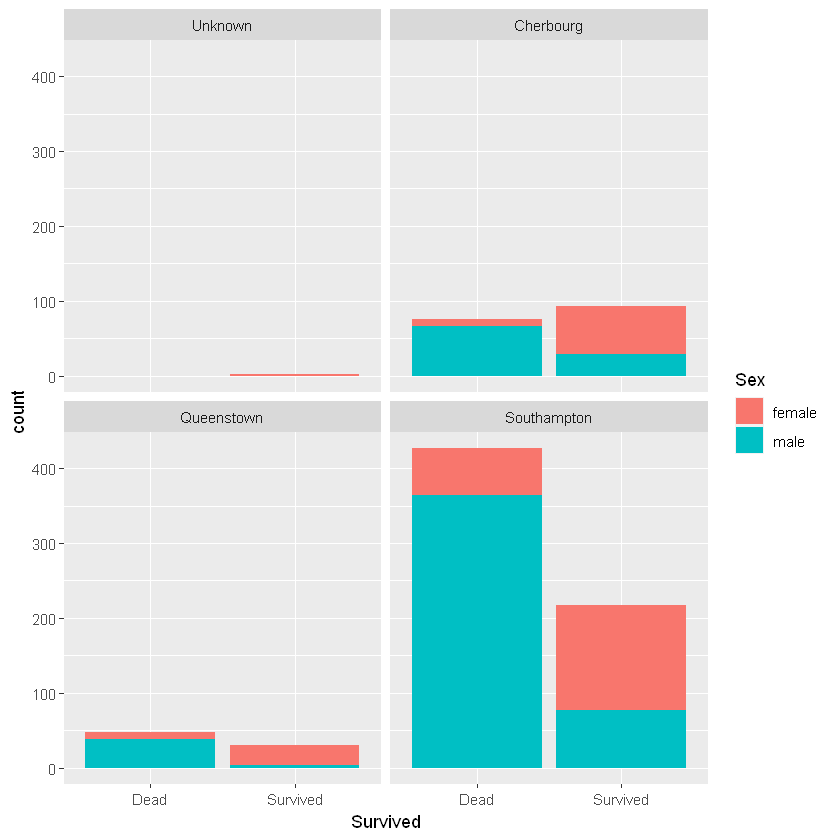

In [19]:
# Same concept as above but faceting with Embarked vector.
survived.sex.plt + geom_bar() + facet_wrap(~Embarked)

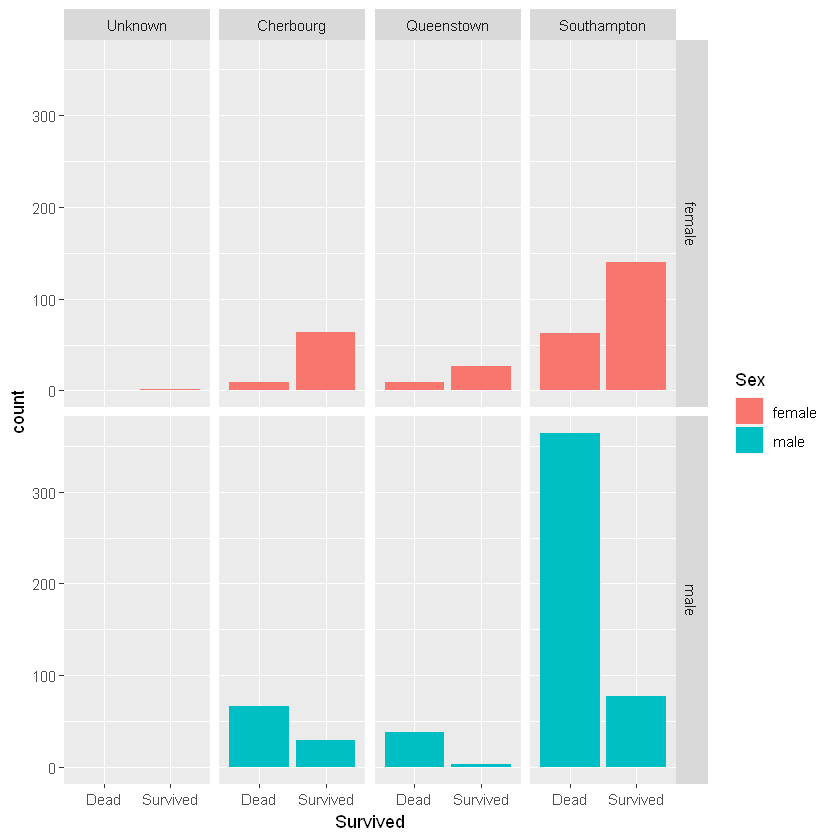

In [20]:
# Facet_wrap() takes only a single variable so using facet_grid(), facetes multiple different variables simultaneously.
survived.sex.plt + geom_bar() + facet_grid(Sex ~ Embarked)

In [21]:
# Age ranges & predictor of survivability.
summary(titanic$Age)
summary(titanic[titanic$Survived=="Dead,"]$Age)
summary(titanic[titanic$Survived=="Survived",]$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.42   20.12   28.00   29.70   38.00   80.00     177 

Length  Class   Mode 
     0   NULL   NULL 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.42   19.00   28.00   28.34   36.00   80.00      52 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 177 rows containing non-finite values (stat_bin)."

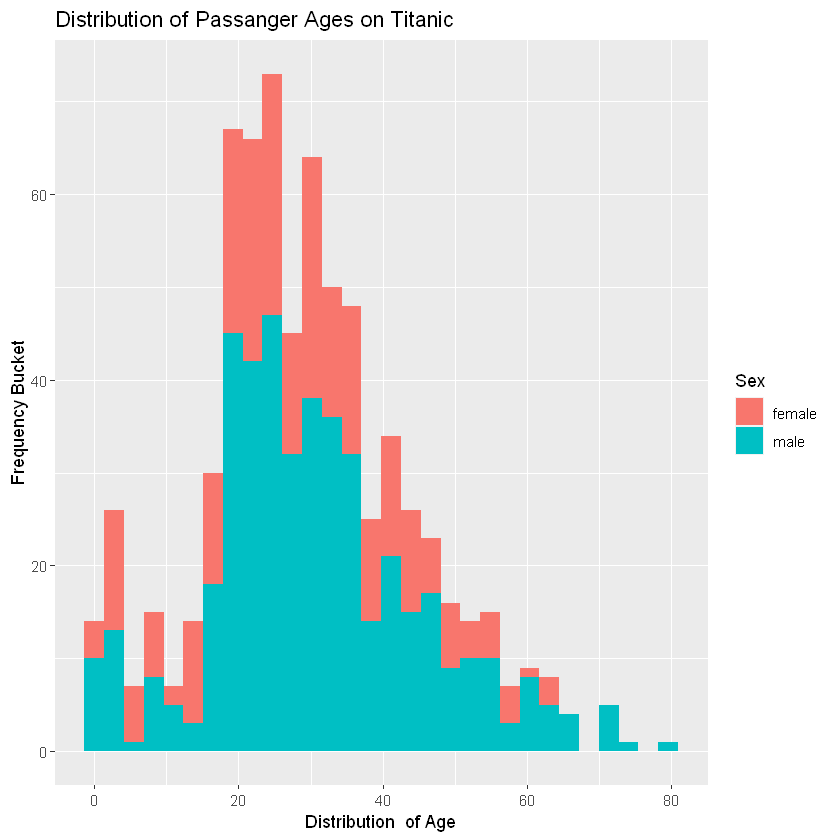

In [23]:
age.sex.plt <- ggplot(titanic, aes(x=Age, fill=Sex)) + geom_histogram()
age.sex.plt + labs(x="Distribution  of Age", y="Frequency Bucket", title="Distribution of Passanger Ages on Titanic")

Warning message:
"Removed 177 rows containing non-finite values (stat_boxplot)."

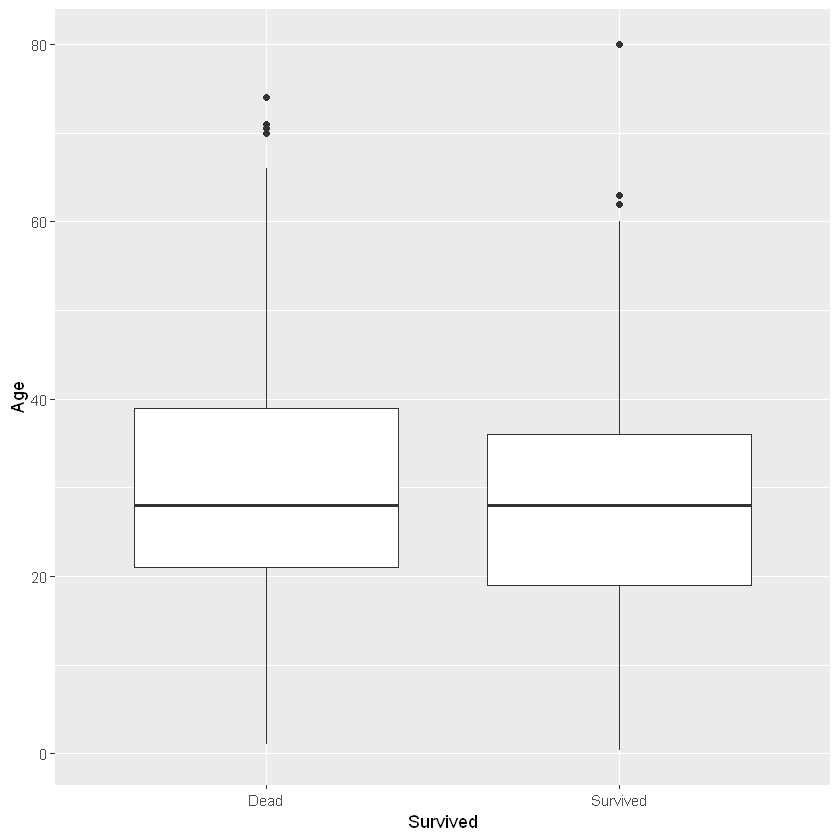

In [24]:
# Ages impact on survivability cont.
survived.age.plt <- ggplot(titanic, aes(x=Survived, y=Age))
survived.age.plt + geom_boxplot()

Warning message:
"Removed 177 rows containing non-finite values (stat_density)."

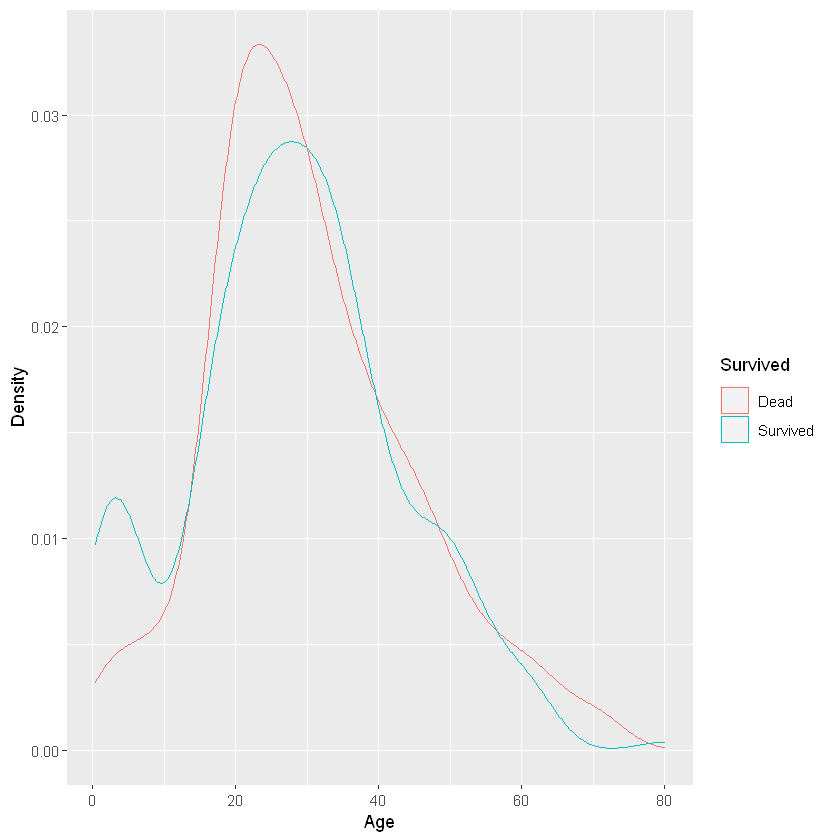

In [25]:
# Same plot using density curve as visualization.
age.survived.plt <- ggplot(titanic, aes(x=Age, color=Survived))
age.survived.plt + geom_density() + ylab("Density")

Warning message:
"Removed 177 rows containing non-finite values (stat_density)."Warning message:
"Groups with fewer than two data points have been dropped."

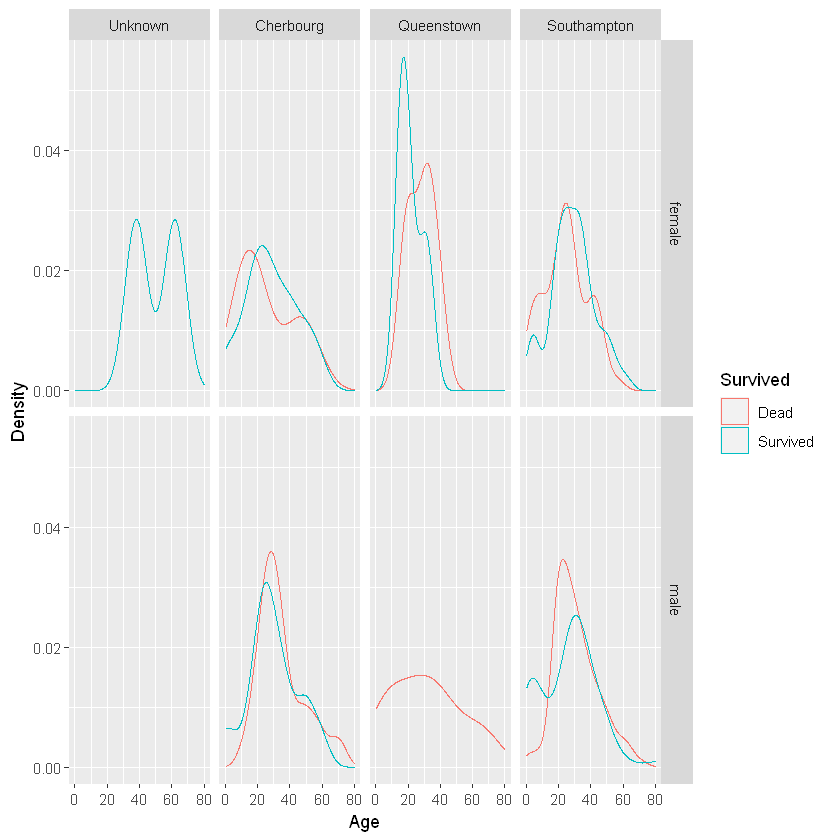

In [26]:
# Segmenting further by adding sex and embarked on top of age of survivability.
age.survived.plt + geom_density() + facet_grid(Sex ~ Embarked) + ylab("Density")